## Loading the libraries

In [1]:
# === Core Python Utilities ===
import os
from datetime import datetime

# === Data Handling ===
import pandas as pd
import numpy as np

# === Visualization ===
import matplotlib.pyplot as plt
import seaborn as sns

# === Statistical Modeling (Interpretable Inference) ===
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

# === Preprocessing ===
from sklearn.preprocessing import StandardScaler

## Exploring the dataset

In [2]:
# Load the dataset
file_path = "/Volumes/Repository/Metaperception/Study 1/Datasets/Part 1/complete_dataset_with_sentiment.csv"
df = pd.read_csv(file_path)

# Display basic information
print("Dataset shape:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())

# Display the first 5 rows
print("\nFirst 5 rows:")
print(df.head())

/var/folders/jr/dg0v0hv96x3_gj0zwfrb19nw0000gn/T/ipykernel_8373/3607108366.py:3: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Dataset shape: (10976231, 15)

Column names:
['full_text', 'conversation_id_str', 'created_at', 'id_str', 'user', 'prolife_prochoice', 'source', 'binary_morality', 'care', 'purity', 'loyalty', 'authority', 'fairness', 'sentiment_score', 'sentiment_label']

First 5 rows:
                                           full_text  conversation_id_str  \
0  Happy #prochoice New Year. #HumanRights for wo...         5.504415e+17   
1  Hands That Shed Innocent Blood\nhttp://t.co/wq...         5.504448e+17   
2  Tx St Rep Trey Martinez Fischer voted for the ...         5.504474e+17   
3  Calvary Chapel Pastor supports @PersonhoodFL F...         5.504482e+17   
4  Black Sheriff Says if Black Lives Mattered The...         5.504492e+17   

                       created_at                id_str  \
0  Thu Jan 01 00:01:02 +0000 2015  550441533166456832.0   
1  Thu Jan 01 00:13:56 +0000 2015  550444775959035904.0   
2  Thu Jan 01 00:24:10 +0000 2015  550447352910078016.0   
3  Thu Jan 01 00:27:40 +0000 2

## Temporal Distribution of Tweets

Number of dates that failed to parse: 803 (0.01%)

Date Range Analysis:
Earliest tweet: 2015-01-01 00:01:02+00:00
Latest tweet: 2023-01-06 00:44:22+00:00
Total time span: 2927 days

Tweets per year:
2015.0: 614,755 tweets (5.60%)
2016.0: 391,122 tweets (3.56%)
2017.0: 416,312 tweets (3.79%)
2018.0: 399,078 tweets (3.64%)
2019.0: 561,406 tweets (5.11%)
2020.0: 309,533 tweets (2.82%)
2022.0: 8,115,928 tweets (73.94%)
2023.0: 167,294 tweets (1.52%)

Sample of date formats in the dataset:
- 2022-08-23 10:54:11+00:00
- 2022-08-01 07:18:34+00:00
- 2022-05-05 13:15:24+00:00
- Mon Sep 10 15:53:11 +0000 2018
- Sun Jun 21 00:32:29 +0000 2015


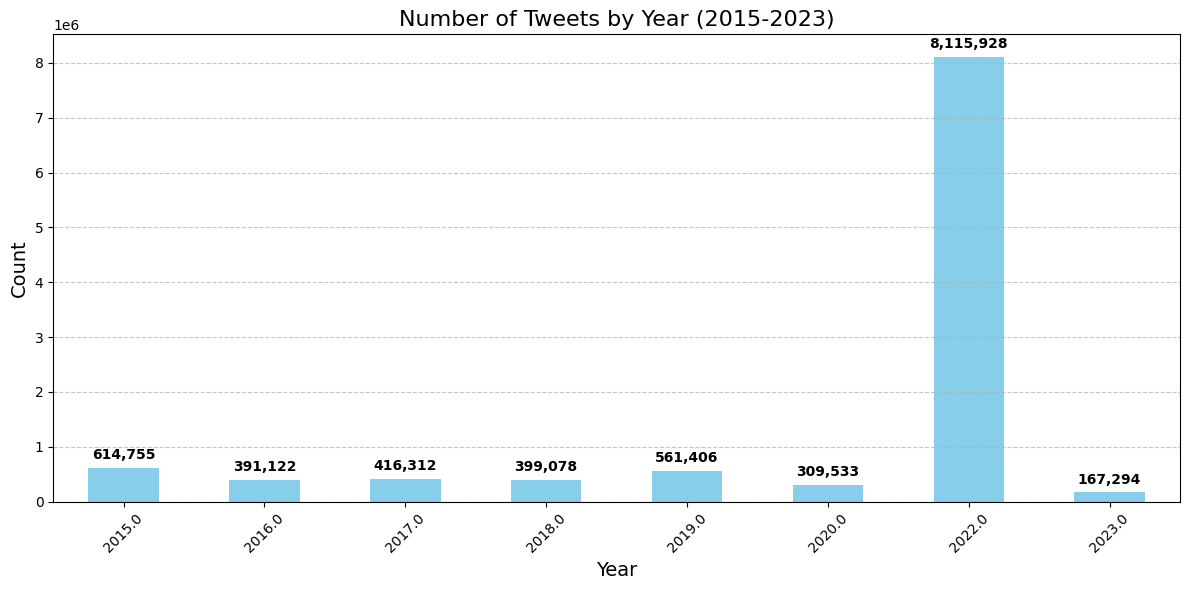

In [3]:
# Convert the 'created_at' column to datetime format with mixed format support
df['created_at_dt'] = pd.to_datetime(df['created_at'], format='mixed', errors='coerce')

# Check for any NaT (Not a Time) values that failed to parse
nat_count = df['created_at_dt'].isna().sum()
print(f"Number of dates that failed to parse: {nat_count} ({nat_count/len(df)*100:.2f}%)")

# Extract year from the datetime
df['year'] = df['created_at_dt'].dt.year

# Find earliest and latest dates
earliest_date = df['created_at_dt'].min()
latest_date = df['created_at_dt'].max()

print(f"\nDate Range Analysis:")
print(f"Earliest tweet: {earliest_date}")
print(f"Latest tweet: {latest_date}")
print(f"Total time span: {(latest_date - earliest_date).days} days")

# Count tweets by year
yearly_counts = df['year'].value_counts().sort_index()
print("\nTweets per year:")
for year, count in yearly_counts.items():
    print(f"{year}: {count:,} tweets ({count/len(df)*100:.2f}%)")

# Examine a few examples of different date formats in the dataset
print("\nSample of date formats in the dataset:")
sample_dates = df['created_at'].sample(5).tolist()
for date in sample_dates:
    print(f"- {date}")

# Create a bar chart of tweets by year
plt.figure(figsize=(12, 6))
yearly_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Tweets by Year (2015-2023)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add count labels on top of each bar
for i, count in enumerate(yearly_counts):
    plt.text(i, count + (yearly_counts.max() * 0.02), f"{count:,}", 
             ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


## Distribution of the Abortion Stance 

Number of unique values in 'prolife_prochoice' column: 4

Unique values and their frequencies:
'choice': 4,308,510 tweets (39.25%)
'throw_out': 3,015,071 tweets (27.47%)
'life': 2,155,755 tweets (19.64%)
'neutral': 1,496,895 tweets (13.64%)

Missing values: 0 (0.00%)


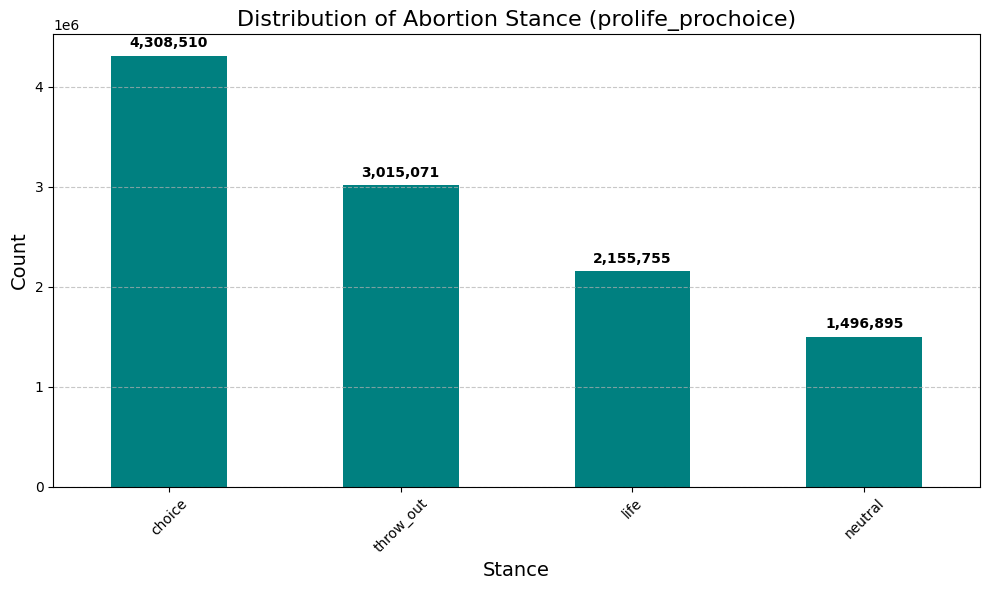

In [4]:
# Get unique values and their counts
stance_counts = df['prolife_prochoice'].value_counts()

# Display the number of unique values
unique_count = len(stance_counts)
print(f"Number of unique values in 'prolife_prochoice' column: {unique_count}")

# Display each unique value and its count
print("\nUnique values and their frequencies:")
for value, count in stance_counts.items():
    print(f"'{value}': {count:,} tweets ({count/len(df)*100:.2f}%)")

# Check for missing values
missing_count = df['prolife_prochoice'].isna().sum()
print(f"\nMissing values: {missing_count} ({missing_count/len(df)*100:.2f}%)")

# Create a visualization if there aren't too many unique values
if unique_count < 10:  
    plt.figure(figsize=(10, 6))
    stance_counts.plot(kind='bar', color='teal')
    plt.title('Distribution of Abortion Stance (prolife_prochoice)', fontsize=16)
    plt.xlabel('Stance', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add count labels on top of each bar
    for i, count in enumerate(stance_counts):
        plt.text(i, count + (stance_counts.max() * 0.02), f"{count:,}", 
                ha='center', fontweight='bold')
    
    plt.tight_layout()
    plt.show()


## Comprehensive Analysis of Stance, Morality, and Moral Foundations by Year

=== STANCE DISTRIBUTION BY YEAR ===

Counts of each stance by year:
prolife_prochoice   choice    life  neutral  throw_out
year                                                  
2015.0              143163  334970   118597      18025
2016.0               92125  216881    73157       8959
2017.0              104068  257394    43404      11446
2018.0              104744  246298    32813      15223
2019.0              165101  338119    40702      17484
2020.0               84274  182622    20315      22322
2022.0             3584087  568083  1159897    2803861
2023.0               30795   11140     7687     117672

Percentage of each stance by year:
prolife_prochoice  choice   life  neutral  throw_out
year                                                
2015.0              23.29  54.49    19.29       2.93
2016.0              23.55  55.45    18.70       2.29
2017.0              25.00  61.83    10.43       2.75
2018.0              26.25  61.72     8.22       3.81
2019.0              29.41  6

<Figure size 1400x800 with 0 Axes>

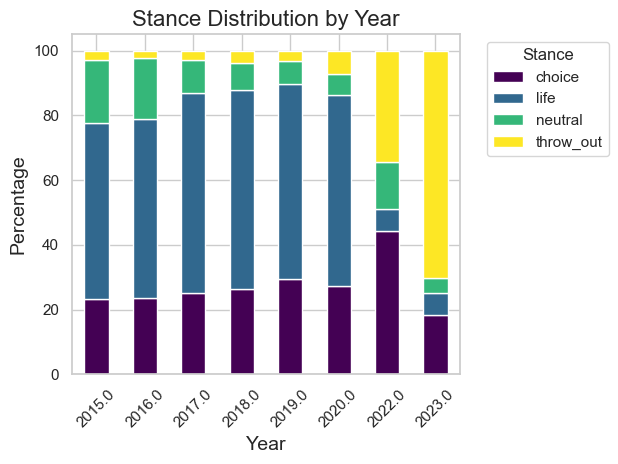


=== MORALITY DISTRIBUTION BY STANCE ===

Counts of moral vs. non-moral tweets by stance:
binary_morality      moral  non-moral
prolife_prochoice                    
choice             2705136    1603374
life               1165214     990541
neutral             165675    1331220
throw_out           832016    2183055

Percentage of moral vs. non-moral tweets by stance:
binary_morality    moral  non-moral
prolife_prochoice                  
choice             62.79      37.21
life               54.05      45.95
neutral            11.07      88.93
throw_out          27.60      72.40


<Figure size 1200x700 with 0 Axes>

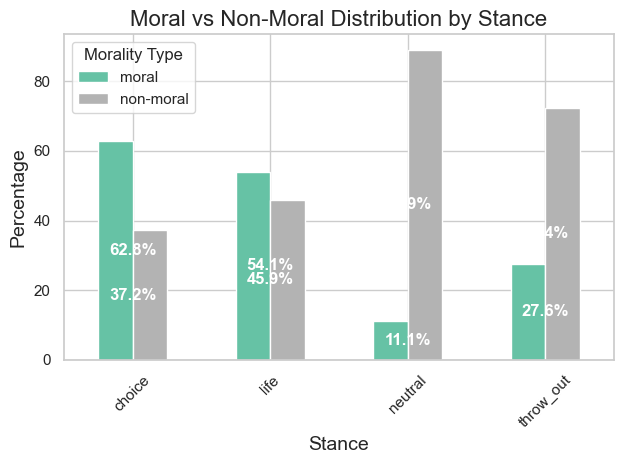


=== MORAL FOUNDATIONS BY STANCE ===

Counts of each moral foundation by stance:
              care  purity  loyalty  authority  fairness
choice     2080495  435688   778661     329426   2191213
life       1008099  476478   177186     179090    488974
neutral      98411   25505    72127       9626    117409
throw_out   742063  180658   109707     235287    396064

Percentage of each moral foundation by stance:
            care  purity  loyalty  authority  fairness
choice     76.91   16.11    28.78      12.18     81.00
life       86.52   40.89    15.21      15.37     41.96
neutral    59.40   15.39    43.54       5.81     70.87
throw_out  89.19   21.71    13.19      28.28     47.60


<Figure size 1400x1000 with 0 Axes>

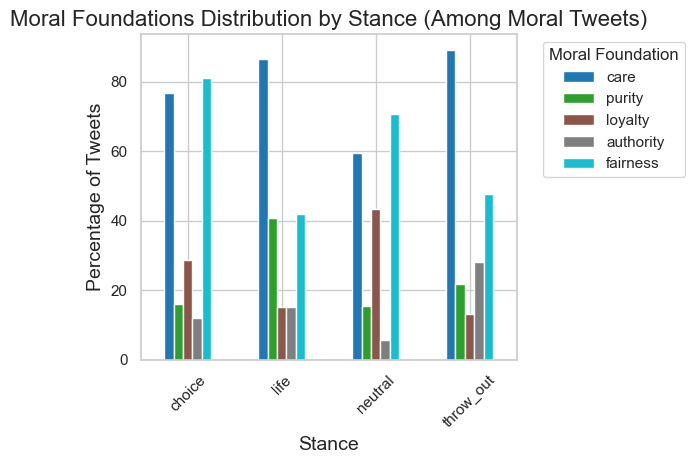

In [6]:
# Set up the visualization style
sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 12})

# 1. Stance distribution by year
print("=== STANCE DISTRIBUTION BY YEAR ===")
stance_by_year = pd.crosstab(df['year'], df['prolife_prochoice'], normalize='index') * 100
stance_counts_by_year = pd.crosstab(df['year'], df['prolife_prochoice'])

# Display raw counts and percentages
print("\nCounts of each stance by year:")
print(stance_counts_by_year)
print("\nPercentage of each stance by year:")
print(stance_by_year.round(2))

# Visualize stance distribution by year
plt.figure(figsize=(14, 8))
stance_by_year.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Stance Distribution by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Stance', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('stance_by_year.png')
plt.show()

# 2. Morality distribution within each stance
print("\n=== MORALITY DISTRIBUTION BY STANCE ===")
morality_by_stance = pd.crosstab(df['prolife_prochoice'], df['binary_morality'], normalize='index') * 100
morality_counts_by_stance = pd.crosstab(df['prolife_prochoice'], df['binary_morality'])

print("\nCounts of moral vs. non-moral tweets by stance:")
print(morality_counts_by_stance)
print("\nPercentage of moral vs. non-moral tweets by stance:")
print(morality_by_stance.round(2))

# Visualize morality distribution by stance
plt.figure(figsize=(12, 7))
morality_by_stance.plot(kind='bar', colormap='Set2')
plt.title('Moral vs Non-Moral Distribution by Stance', fontsize=16)
plt.xlabel('Stance', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Morality Type')
for i, stance in enumerate(morality_by_stance.index):
    for col in morality_by_stance.columns:
        value = morality_by_stance.loc[stance, col]
        plt.text(i, value/2, f"{value:.1f}%", ha='center', va='center', 
                 color='white', fontweight='bold')
plt.tight_layout()
plt.savefig('morality_by_stance.png')
plt.show()

# 3. Moral foundation distribution for moral tweets within each stance
print("\n=== MORAL FOUNDATIONS BY STANCE ===")

# Filter only moral tweets
moral_tweets = df[df['binary_morality'] == 'moral']

# Create a function to analyze moral foundations
def analyze_moral_foundations():
    foundation_columns = ['care', 'purity', 'loyalty', 'authority', 'fairness']
    
    # Total counts by stance
    foundation_counts = {}
    foundation_percentages = {}
    
    for stance in moral_tweets['prolife_prochoice'].unique():
        stance_data = moral_tweets[moral_tweets['prolife_prochoice'] == stance]
        stance_total = len(stance_data)
        
        # Count each foundation
        counts = {}
        percentages = {}
        for foundation in foundation_columns:
            count = stance_data[foundation].sum()
            counts[foundation] = count
            percentages[foundation] = (count / stance_total) * 100
            
        foundation_counts[stance] = counts
        foundation_percentages[stance] = percentages
    
    # Convert to DataFrames
    counts_df = pd.DataFrame(foundation_counts).T
    percentages_df = pd.DataFrame(foundation_percentages).T
    
    return counts_df, percentages_df

foundation_counts, foundation_percentages = analyze_moral_foundations()

print("\nCounts of each moral foundation by stance:")
print(foundation_counts)
print("\nPercentage of each moral foundation by stance:")
print(foundation_percentages.round(2))

# Visualize moral foundations by stance
plt.figure(figsize=(14, 10))
foundation_percentages.plot(kind='bar', colormap='tab10')
plt.title('Moral Foundations Distribution by Stance (Among Moral Tweets)', fontsize=16)
plt.xlabel('Stance', fontsize=14)
plt.ylabel('Percentage of Tweets', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Moral Foundation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('moral_foundations_by_stance.png')
plt.show()


## Logistic Regression

In [8]:
df['individualizing'] = ((df['care'] == 1) | (df['fairness'] == 1)).astype(int)
df['binding'] = ((df['authority'] == 1) | (df['loyalty'] == 1) | (df['purity'] == 1)).astype(int)

df['sentiment_c'] = df['sentiment_score'] - df['sentiment_score'].mean()
df['individualizing_x_sentiment'] = df['individualizing'] * df['sentiment_c']
df['binding_x_sentiment'] = df['binding'] * df['sentiment_c']

y = (df['prolife_prochoice'] == 'choice').astype(int)

X = df[['individualizing','binding','sentiment_c',
        'individualizing_x_sentiment','binding_x_sentiment']]
X = sm.add_constant(X)

res = sm.Logit(y, X).fit(disp=False, cov_type="HC3")

ci = res.conf_int()
or_table = pd.DataFrame({
    'OR': np.exp(res.params),
    'OR 2.5%': np.exp(ci[0]),
    'OR 97.5%': np.exp(ci[1]),
    'p': res.pvalues
})

print(or_table)
print("N =", int(res.nobs), "| LogLik =", res.llf, "| AIC =", res.aic, "| McFadden R2 =", res.prsquared)

                                   OR   OR 2.5%  OR 97.5%    p
const                        0.369221  0.368561  0.369883  0.0
individualizing              3.645348  3.634024  3.656707  0.0
binding                      0.862586  0.859499  0.865684  0.0
sentiment_c                  0.656416  0.653918  0.658924  0.0
individualizing_x_sentiment  1.281807  1.274618  1.289036  0.0
binding_x_sentiment          0.750282  0.745964  0.754624  0.0
N = 10976231 | LogLik = -6790940.863170859 | AIC = 13581893.726341719 | McFadden R2 = 0.07639070960661598


## Plot

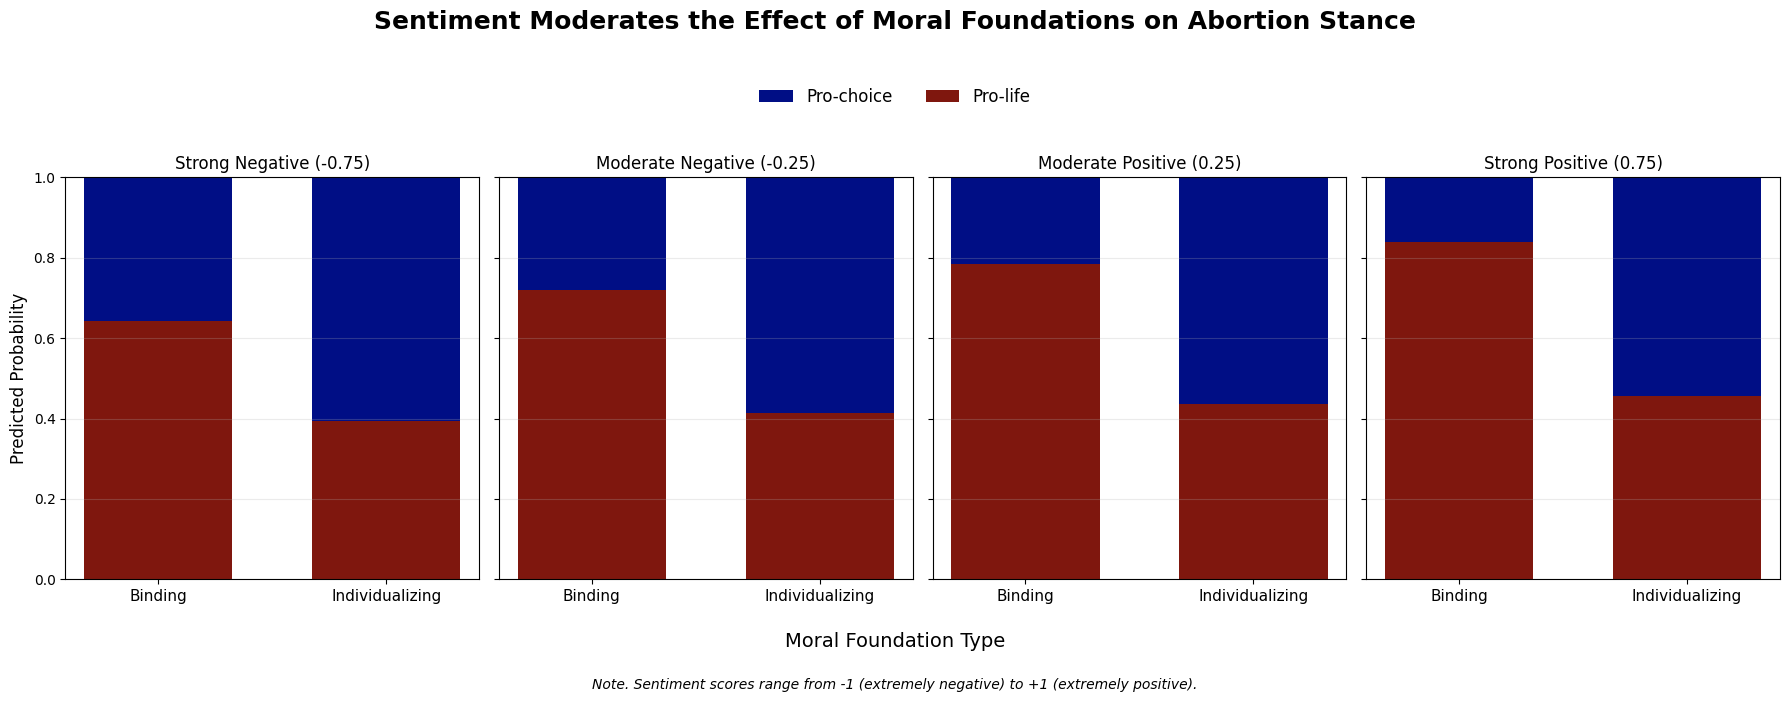

In [14]:
COLOR_PRO_CHOICE = "#000E85"   # Pro-choice (top)
COLOR_PRO_LIFE   = "#7F170E"   # Pro-life (bottom)

sent_levels_raw = [-0.75, -0.25, 0.25, 0.75]
panel_titles = [
    "Strong Negative (-0.75)",
    "Moderate Negative (-0.25)",
    "Moderate Positive (0.25)",
    "Strong Positive (0.75)"
]
foundation_types = ["Binding", "Individualizing"]
bar_width = 0.65

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# res should already exist from:
# res = sm.Logit(y, X).fit(disp=False, cov_type="HC3")
params = res.params

needed = ["const", "individualizing", "binding", "sentiment_c",
          "individualizing_x_sentiment", "binding_x_sentiment"]
missing = [k for k in needed if k not in params.index]
if missing:
    raise ValueError(f"Model is missing terms: {missing}\nFound: {list(params.index)}")

# Convert raw sentiment values to centered (must match the model)
sent_mean = df["sentiment_score"].mean()
sent_levels_c = [s - sent_mean for s in sent_levels_raw]

def predict_prochoice(individualizing, binding, sentiment_c):
    x = {
        "const": 1.0,
        "individualizing": float(individualizing),
        "binding": float(binding),
        "sentiment_c": float(sentiment_c),
        "individualizing_x_sentiment": float(individualizing) * float(sentiment_c),
        "binding_x_sentiment": float(binding) * float(sentiment_c),
    }
    eta = sum(params[k] * x[k] for k in x.keys())
    return sigmoid(eta)

# Compute predicted probabilities: shape (4 panels, 2 foundations)
prochoice = []
for s_c in sent_levels_c:
    p_binding = predict_prochoice(individualizing=0, binding=1, sentiment_c=s_c)
    p_indiv   = predict_prochoice(individualizing=1, binding=0, sentiment_c=s_c)
    prochoice.append([p_binding, p_indiv])

prochoice = np.array(prochoice)
prolife = 1 - prochoice

# -----------------------------
# Plot
# -----------------------------
fig, axes = plt.subplots(1, 4, figsize=(18, 7), sharey=True)

fig.suptitle(
    "Sentiment Moderates the Effect of Moral Foundations on Abortion Stance",
    fontsize=18, fontweight="bold", y=0.99
)

x = np.arange(len(foundation_types))

for i, ax in enumerate(axes):
    ax.set_title(panel_titles[i], fontsize=12)

    # bottom: Pro-life
    ax.bar(x, prolife[i], width=bar_width, color=COLOR_PRO_LIFE, label="Pro-life")
    # top: Pro-choice
    ax.bar(x, prochoice[i], bottom=prolife[i], width=bar_width, color=COLOR_PRO_CHOICE, label="Pro-choice")

    ax.set_xticks(x)
    ax.set_xticklabels(foundation_types, fontsize=11)
    ax.set_ylim(0, 1.0)
    ax.grid(axis="y", alpha=0.25)

    if i == 0:
        ax.set_ylabel("Predicted Probability", fontsize=12)

# --- Put ONE legend at the TOP (so it can't collide with x-ticks)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(
    [handles[1], handles[0]], ["Pro-choice", "Pro-life"],
    loc="upper center",
    bbox_to_anchor=(0.5, 0.90),  # adjust this slightly if you want
    ncol=2,
    frameon=False,
    fontsize=12
)

# One global x-axis label (below panels)
fig.text(0.5, 0.08, "Moral Foundation Type", ha="center", fontsize=14)

# Footnote at very bottom
fig.text(
    0.5, 0.02,
    "Note. Sentiment scores range from -1 (extremely negative) to +1 (extremely positive).",
    ha="center", fontsize=10, style="italic"
)

# Reserve space: top for legend/title, bottom for x-label + note
plt.tight_layout(rect=[0, 0.12, 1, 0.86])

plt.savefig("/Users/daryani/Desktop/sentiment_foundations_stance_panels.png", dpi=300, bbox_inches="tight")
plt.show()
